## Solve differential equations in Julia and pathlines

In today's lecture, we will learn how to solve ordinary differential equations. We will then use it to plot pathlines of fluid particles

### A 1D differential equation

In this first example, we will solve the equation:
$$ \frac{d u}{dt} = -u$$ with $u(t=0) = 1$

We know the analytical solution for this problem : $u(t) = exp(-t)$

In Julia, we can call the package OrdinaryDiffEq to solve numerically ODEs

In [1]:
using DifferentialEquations

The first step is to define the right hand side of the differential equation, here `f(u,p,t) = -u`

In [2]:
f(u,p,t) = -u

f (generic function with 1 method)

The initial condition is `u0 = 1`

In [3]:
u0=1.0
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

The variable `prob` holds all the useful informations about the differential problem : right-hand side, initial condition, time span...

We will solve this ODe with a Runge-Kutta 4 scheme

In [4]:
sol = solve(prob,RK4())

retcode: Success
Interpolation: 3rd order Hermite
t: 9-element Array{Float64,1}:
 0.0                
 0.05624818578328793
 0.14782943808279425
 0.25962257189805726
 0.40384555436170894
 0.5721262490729604 
 0.7671666730151347 
 0.9837278653277591 
 1.0                
u: 9-element Array{Float64,1}:
 1.0               
 0.9453045002861185
 0.8625782796173731
 0.7713428289684262
 0.6677477842376573
 0.5643254551784176
 0.4643290579402124
 0.3739181943340857
 0.3678829831749696

##### Plotting the solution

In [5]:
using Plots

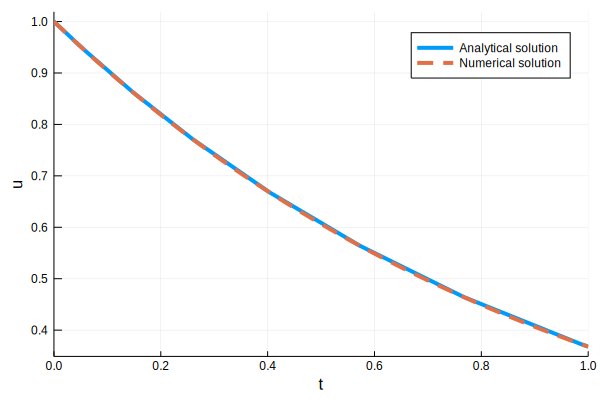

In [6]:
plot(sol.t, exp.(-sol.t), linewidth = 4, label = "Analytical solution")
plot!(sol,linewidth=4, xaxis="t",yaxis="u", linestyle =:dash, label = "Numerical solution" ) # legend=false

In [7]:
# using Interpolations

### Solve for the pathline of a fluid particle in a Couette Flow

For a Couette flow, the velocity profile is:
$$ \boldsymbol{u} = u(y)\boldsymbol{e}_x = U\frac{y}{H} \boldsymbol{e}_x$$ with $U$ the velocity of the upper plate and $H$ the depth of the gap


The trajectory of a fluid particle A is denoted $\boldsymbol{x}_A$ and a solution of: 

$$\frac{d \boldsymbol{x}_A}{dt} = \boldsymbol{u}_A(t) = \boldsymbol{u}(x_A, y_A, z_A, t) $$

with initial condition $\boldsymbol{x}_A(t= 0) = \boldsymbol{x}_0$

Let's solve for the pathline of a fluid particle. For this problem we have :
$$ \frac{d x_A}{dt} = u(x_A, y_A,t) = u(y_A) = U\frac{y_A}{H} $$

$$ \frac{d y_A}{dt} = v(x_A, y_A,t) = 0 $$

Define the parameters for the Couette flow

In [8]:
U = 1
H = 1

couette_velocity(y) = U*y/H

couette_velocity (generic function with 1 method)

Let's define the right-hand side of the equation

In [9]:
function couette(du,u,p,t)
 du[1] = couette_velocity(u[2]) # U * (yₐ/H)
 du[2] = 0.0
 du[3] = couette_velocity(u[4]) # U * (yₐ/H)
 du[4] = 0.0
 du[5] = couette_velocity(u[6]) # U * (yₐ/H)
 du[6] = 0.0
end

couette (generic function with 1 method)

In [10]:
## Initial position of the fluid particle
x0=[0.0, 0.1, 0.0 , 0.3, 0.0, 0.8]


# Time span
tspan = (0.0,1.0)


prob_couette = ODEProblem(couette, x0, tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [0.0, 0.1, 0.0, 0.3, 0.0, 0.8]

Now, we can solve the differential equation and get the pathline of this fluid particle

In [11]:
couette_sol  = solve(prob_couette, RK4())

retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Array{Float64,1}:
 0.0                  
 0.0020037691673443665
 0.022041460840788032 
 0.22241837757522467  
 1.0                  
u: 5-element Array{Array{Float64,1},1}:
 [0.0, 0.1, 0.0, 0.3, 0.0, 0.8]                                                       
 [0.00020037691673443667, 0.1, 0.0006011307502033099, 0.3, 0.0016030153338754934, 0.8]
 [0.0022041460840788035, 0.1, 0.006612438252236409, 0.3, 0.017633168672630428, 0.8]   
 [0.02224183775752247, 0.1, 0.06672551327256739, 0.3, 0.17793470206017975, 0.8]       
 [0.10000000000000002, 0.1, 0.3, 0.3, 0.8000000000000002, 0.8]                        

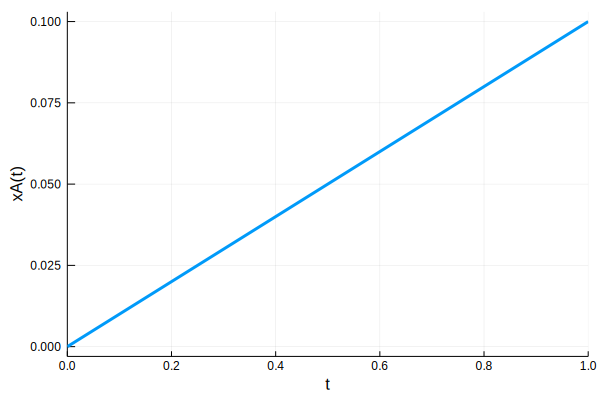

In [12]:
plot(couette_sol, vars = 1, legend = false, xlabel = "t", ylabel = "xA(t)")

┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/QR8NK/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/QR8NK/src/ticks.jl:168


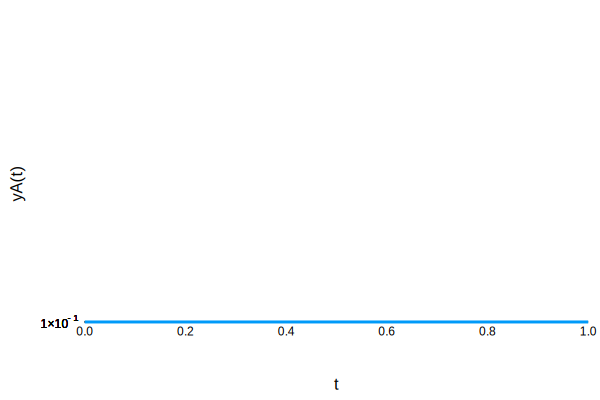

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/QR8NK/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/QR8NK/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/QR8NK/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/QR8NK/src/ticks.jl:168
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW


In [13]:
plot(couette_sol, vars = 2, legend = false, xlabel = "t", ylabel = "yA(t)")

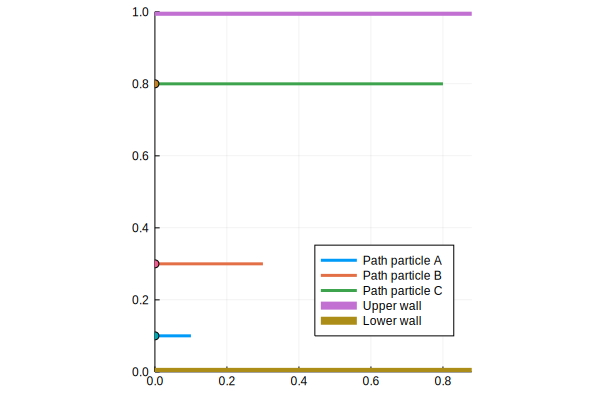

In [14]:
plot(couette_sol, vars = (1,2), ylim =(0, H), label = "Path particle A")
plot!(couette_sol, vars = (3,4), ylim =(0, H), label = "Path particle B")
plot!(couette_sol, vars = (5,6), ylim =(0, H), label = "Path particle C")
plot!([1.0], line = :hline, linewidth = 8, label = "Upper wall")
plot!([0.0], line = :hline, linewidth = 8, label = "Lower wall", ratio = 1)
scatter!([x0[1]], [x0[2]], label = "")
scatter!([x0[3]], [x0[4]], label = "", legend = :bottomright)
scatter!([x0[5]], [x0[6]], label = "", legend = :bottomright)

## Trajectory of a fluid particle in a cellular flow

In [15]:
A = 32.0
B = 3.2
ω = 9.2

ψ(x, y, t) = A*cos(x + B*sin(ω*t))*cos(y)

ucell(x, y, t) =  A*cos(x + B*sin(ω*t))*sin(y)

vcell(x, y, t) = -A*sin(x + B*sin(ω*t))*cos(y)

vcell (generic function with 1 method)

In [16]:
xrange = -4.0:0.05:12.0
yrange = -4.0:0.05:12.0

function ψtab(t) 
    out  = zeros(xrange.len ,yrange.len)


for (i, xi) in enumerate(xrange)
    for (j, yj) in enumerate(yrange)
    
        out[i, j] = ψ(xi, yj , t)
        
    end
end
    
    return out
end

ψtab (generic function with 1 method)

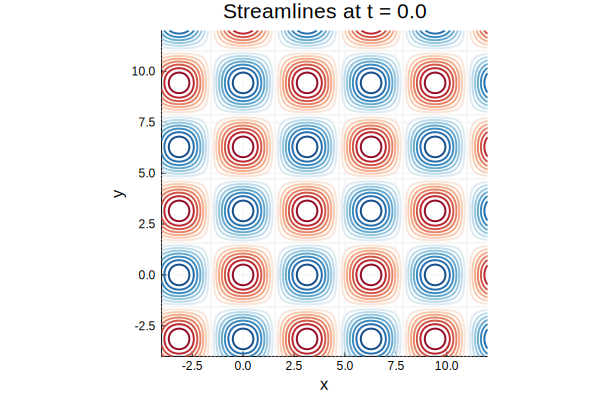

In [17]:
plot(xrange, yrange, ψtab(0.0)', ratio = 1, xlim = (xrange[1], xrange[end]), ylim = (yrange[1], yrange[end]), colorbar = false,
            xlabel ="x", ylabel = "y", title = "Streamlines at t = "*string(0.0), color = :RdBu_r, linewidth = 2)

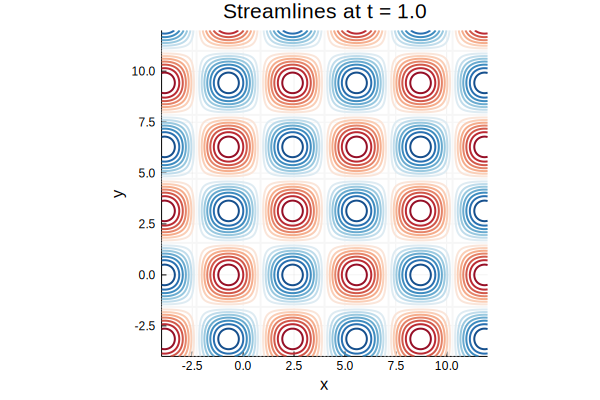

In [18]:
plot(xrange, yrange, ψtab(1.0)', ratio = 1, xlim = (xrange[1], xrange[end]), ylim = (yrange[1], yrange[end]), colorbar = false,
            xlabel ="x", ylabel = "y", title = "Streamlines at t = "*string(1.0), color = :RdBu_r, linewidth = 2)

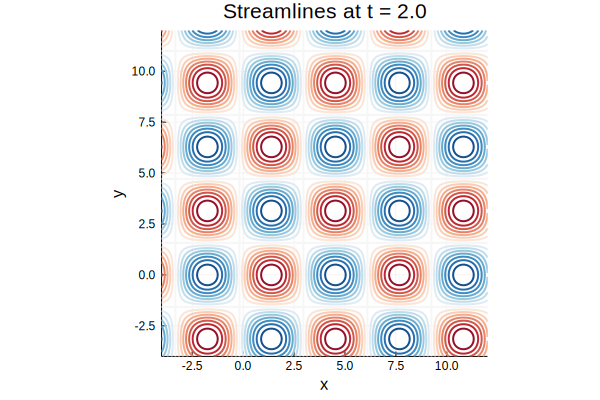

In [19]:
plot(xrange, yrange, ψtab(2.0)', ratio = 1, xlim = (xrange[1], xrange[end]), ylim = (yrange[1], yrange[end]), colorbar = false,
            xlabel ="x", ylabel = "y", title = "Streamlines at t = "*string(2.0), color = :RdBu_r, linewidth = 2)

In [20]:
function cellular_flow(du,u,p,t)
 du[1] = ucell(u[1], u[2], t)
 du[2] = vcell(u[1], u[2], t)
end

cellular_flow (generic function with 1 method)

In [27]:
## Initial position of the fluid particle
x0_cell=[3.20, 1.88]


# Time span
tspan = (0.0,2.0)


prob_cellular = ODEProblem(cellular_flow, x0_cell, tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 2.0)
u0: [3.2, 1.88]

In [28]:
cellular_sol  = solve(prob_cellular, RK4());

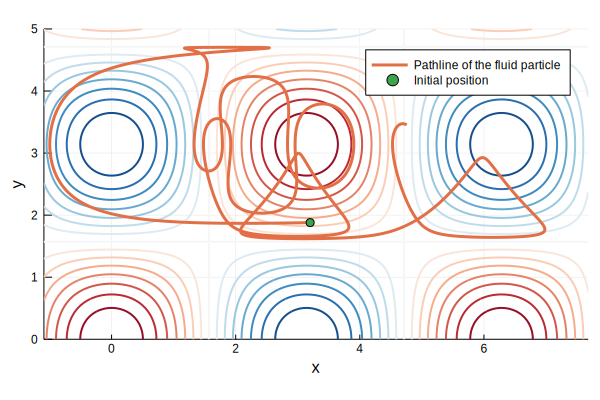

In [29]:
plot(xrange, yrange, ψtab(0.0)', ratio = 1, xlim = (xrange[1], xrange[end]), ylim = (0.0, 5.0), colorbar = false,
            xlabel ="x", ylabel = "y", linewidth = 2, color = :RdBu_r)
plot!(cellular_sol, vars = (1,2), label = "Pathline of the fluid particle")
scatter!([x0_cell[1]], [x0_cell[2]], label ="Initial position")